# Analyzing CIA Factbook Data Using SQL

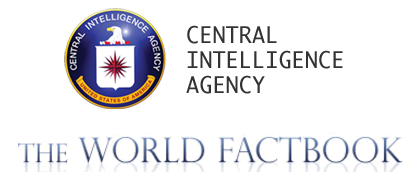

### Introduction
In this project, we'll work with data from the [CIA World Factbook](https://www.cia.gov/the-world-factbook/), a compendium of statistics about all of the countries on Earth. The Factbook contains demographic information like the following:

`population` — the global population.

`population_growth` — the annual population growth rate, as a percentage.

`area` — the total land and water area.

To start we will connect our Juypter Notebook to our database file.

In [1]:
%%capture
%load_ext sql
%sql sqlite:///factbook.db

### Overview of the Data
We'll begin by getting a  sense of what the data looks like and how many tables/datasets our database factbook.db has.

In [2]:
%%sql
SELECT *
    FROM sqlite_master
WHERE type = 'table';

 * sqlite:///factbook.db
Done.


type,name,tbl_name,rootpage,sql
table,sqlite_sequence,sqlite_sequence,3,"CREATE TABLE sqlite_sequence(name,seq)"
table,facts,facts,47,"CREATE TABLE ""facts"" (""id"" INTEGER PRIMARY KEY AUTOINCREMENT NOT NULL, ""code"" varchar(255) NOT NULL, ""name"" varchar(255) NOT NULL, ""area"" integer, ""area_land"" integer, ""area_water"" integer, ""population"" integer, ""population_growth"" float, ""birth_rate"" float, ""death_rate"" float, ""migration_rate"" float)"


Above we can see that our database factbook.db has two tables. A table that creates that database and a table that has all the data. We will be exploring the table named "facts" which has all our data about the countries. Let's code a query to see the overview of the table.

In [3]:
%%sql
pragma table_info(facts);

 * sqlite:///factbook.db
Done.


cid,name,type,notnull,dflt_value,pk
0,id,INTEGER,1,None,1
1,code,varchar(255),1,None,0
2,name,varchar(255),1,None,0
3,area,integer,0,None,0
4,area_land,integer,0,None,0
5,area_water,integer,0,None,0
6,population,integer,0,None,0
7,population_growth,float,0,None,0
8,birth_rate,float,0,None,0
9,death_rate,float,0,None,0


Above we see that our table has 11 columns and that our columns in the table is mostly made up of the datatypes like float and integer. We don't know how many rows our table has let's, write a query to find out how many rows our table has and let's print out the first five rows of the table.

In [4]:
%%sql
SELECT (SELECT COUNT(*)
FROM facts) AS "Number of Rows", * 
FROM facts
LIMIT 5;

 * sqlite:///factbook.db
Done.


Number of Rows,id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
261,1,af,Afghanistan,652230,652230,0,32564342,2.32,38.57,13.89,1.51
261,2,al,Albania,28748,27398,1350,3029278,0.3,12.92,6.58,3.3
261,3,ag,Algeria,2381741,2381741,0,39542166,1.84,23.67,4.31,0.92
261,4,an,Andorra,468,468,0,85580,0.12,8.13,6.96,0.0
261,5,ao,Angola,1246700,1246700,0,19625353,2.78,38.78,11.49,0.46


By looking at our query we can tell that each column in the "facts" table has 261 rows. 
Here are the descriptions for some of the columns:
- `id` - A unique numbered ID assigned to every country.

- `code` - For every country the first two letters of the countries name.

- `name` - The name of the country

- `area` - The total land and sea area of the country.

- `area_land` - The country's land area in [square kilometers](https://www.cia.gov/library/publications/the-world-factbook/rankorder/2147rank.html).

- `area_water` - The country's waterarea in  [square kilometers](https://www.cia.gov/library/publications/the-world-factbook/rankorder/2147rank.html).

- `population` - The country's population.

- `population_growth` - The country's population growth as a percentage.

- `birth_rate` - The country's birth rate, or the number of births a year per 1,000 people.

- `death_rate` - The country's death rate, or the number of death a year per 1,000 people.

- `migration_rate` - The amount of people that migrate as a percentage

To get a better understanding of the data let's start by calculating some summary statistics and see what they tell us.

### Summary Statistics

In [5]:
%%sql
SELECT MIN(population) AS "Minimum Population", 
       MAX(population) AS "Maximum Population",
       MIN(population_growth) AS "Minimum Population Growth",
       MAX(population_growth) AS "Maximum Population Growth"
    FROM facts;

 * sqlite:///factbook.db
Done.


Minimum Population,Maximum Population,Minimum Population Growth,Maximum Population Growth
0,7256490011,0.0,4.02


A few things stick out from the summary statistics in the last screen:

- There's a country with a population of `0`

- There's a country with a population of `7256490011`, in other words a population of more than 7.2 billion.

Let's use subqueries to zoom in on just these countries without using the specific values.



### Exploring Outliers
First, we will find out the country which had the population of `0` and then we will look at the country which had a population of more than `7.2` billion

In [6]:
%%sql
SELECT *
FROM facts
WHERE population IN (SELECT MIN(population)
                         FROM facts);

 * sqlite:///factbook.db
Done.


id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
250,ay,Antarctica,None,280000,None,0,None,None,None,None


It seems like the table contains a row for Antarctica, which explains the population of 0. This seems to match the CIA Factbook [page for Antarctica](https://www.cia.gov/library/publications/the-world-factbook/geos/ay.html):

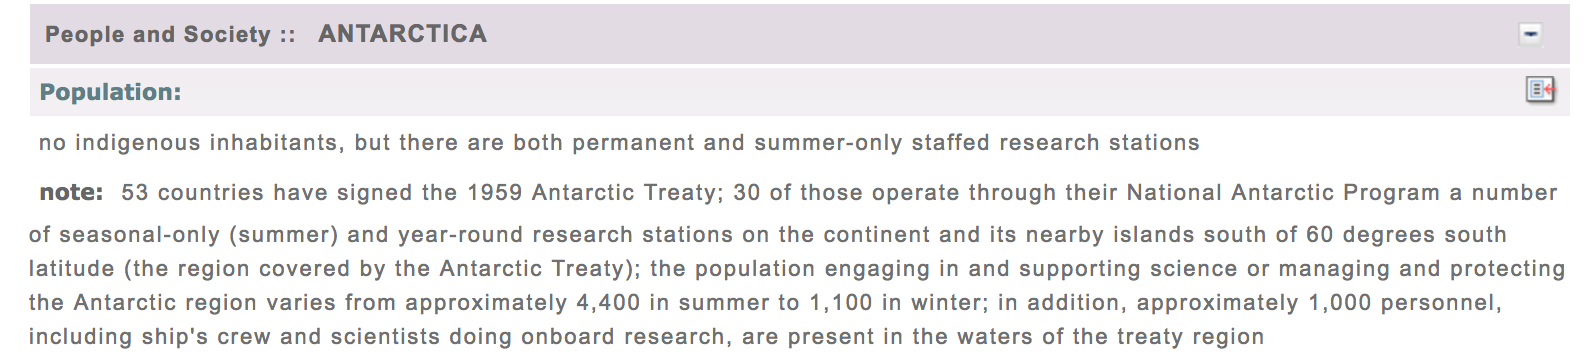



In [7]:
%%sql
SELECT *
FROM facts
WHERE population IN (SELECT MAX(population)
                               FROM facts);

 * sqlite:///factbook.db
Done.


id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
261,xx,World,None,None,None,7256490011,1.08,18.6,7.8,None


We also see that the table contains a row for the whole world, which explains the maximum population of over 7.2 billion we found earlier.

Now that we know this, we should recalculate the summary statistics we calculated earlier, while excluding the row for the whole world.

### Summary Statistics Revisited

In [8]:
%%sql
SELECT MIN(population) AS "Minimum Population", 
       MAX(population) AS "Maximum Population",
       MIN(population_growth) AS "Minimum Population Growth",
       MAX(population_growth) AS "Maximum Population Growth"
    FROM facts
    WHERE name <> "World";

 * sqlite:///factbook.db
Done.


Minimum Population,Maximum Population,Minimum Population Growth,Maximum Population Growth
0,1367485388,0.0,4.02


There's a country whose population closes in on 1.4 billion!

### Exploring Average Population and Area
Let's explore density. Density depends on the population and the country's area. Let's look at the average values for these two columns(`population`,`area`).

We should take care of discarding the row for the whole planet.

In [9]:
%%sql
SELECT AVG(population) AS "Average Population", 
       AVG(area) AS "Average Area"
FROM facts
WHERE name <> "World";

 * sqlite:///factbook.db
Done.


Average Population,Average Area
32242666.56846473,555093.546184739


We see that the average population is around 32 million and the average area is 555 thousand square kilometers.

### Finding Densely Populated Countries
We will build on the query that we wrote earlier to find countries that are densely populated. We'll identify countries that have the following:
- Above-average values for population.

- Below-average values for area.

In [10]:
%%sql
SELECT *
FROM facts
WHERE population > (SELECT AVG(population)
                       FROM facts
                    WHERE name <> "World")
     AND area < (SELECT AVG(area)
                    FROM facts
                WHERE name <> "World");

 * sqlite:///factbook.db
Done.


id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
14,bg,Bangladesh,148460,130170,18290,168957745,1.6,21.14,5.61,0.46
65,gm,Germany,357022,348672,8350,80854408,0.17,8.47,11.42,1.24
80,iz,Iraq,438317,437367,950,37056169,2.93,31.45,3.77,1.62
83,it,Italy,301340,294140,7200,61855120,0.27,8.74,10.19,4.1
85,ja,Japan,377915,364485,13430,126919659,0.16,7.93,9.51,0.0
91,ks,"Korea, South",99720,96920,2800,49115196,0.14,8.19,6.75,0.0
120,mo,Morocco,446550,446300,250,33322699,1.0,18.2,4.81,3.36
138,rp,Philippines,300000,298170,1830,100998376,1.61,24.27,6.11,2.09
139,pl,Poland,312685,304255,8430,38562189,0.09,9.74,10.19,0.46
163,sp,Spain,505370,498980,6390,48146134,0.89,9.64,9.04,8.31


Some of these countries are generally known to be densely populated, so we have confidence in our results!

### Most People? Highest Growth Rate?
We will exlpore the country with the most peple and then we will explore the country with the highest growth rate.

In [11]:
%%sql
SELECT *
FROM facts
WHERE population == (SELECT MAX(population)
                        FROM facts
                     WHERE name <> "World")

 * sqlite:///factbook.db
Done.


id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
37,ch,China,9596960,9326410,270550,1367485388,0.45,12.49,7.53,0.44


We can see that China is the country with the highest population at about 1.37 billion people. This may be because of high birth rates and lower death rates. Next, we will look at the country with the highest population growth rate:

In [12]:
%%sql
SELECT *
FROM facts
WHERE population_growth == (SELECT MAX(population_growth)
                                FROM facts
                            WHERE name <> "World");

 * sqlite:///factbook.db
Done.


id,code,name,area,area_land,area_water,population,population_growth,birth_rate,death_rate,migration_rate
162,od,South Sudan,644329,None,None,12042910,4.02,36.91,8.18,11.47


South Sudan is the country with the highest population growth rate at a rate of 4.02%, this can be because Sunda is known to have a contraceptive prevalence of just 9%.

# Conclusion
We have exemplified the use of SQL to quickly explore, aggregate, and summarize a large amount of data using very little code. We've shown just how powerful a tool SQL can be, especially when it comes to speed and readability of complex queries.